In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
train_df=pd.read_csv("/content/drive/MyDrive/CyberLabs_ML/unsupervised_data.csv", header=0)
x_df=train_df.iloc[:,1:8]
print(x_df.shape, type(train_df))

x_arr=x_df.values

print(x_arr.shape,type(x_arr))



(40000, 6) <class 'pandas.core.frame.DataFrame'>
(40000, 6) <class 'numpy.ndarray'>


In [26]:
print(x_arr[0])

[-21.90459052 -22.65909077  12.80599532 -46.63193454 -34.34708058
 -21.98973763]


In [27]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray (m,n))     : input data, m examples, n features

    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return (X_norm, mu, sigma)

x, x_mu1, x_sig1 = zscore_normalize_features(x_arr)

In [28]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example

    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): (K, n) centroids

    Returns:
        idx (array_like): (m,) closest centroids

    """
    K = centroids.shape[0]

    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):

        dist=0.
        dist1=np.zeros(K)
        for j in range(K):
            dist=0.
            for p in range(X.shape[1]):
                dist += (X[i][p]-centroids[j][p])**2
            dist1[j]= dist
        a=np.min(dist1)
        for m in range(K):
            if dist1[m]==a:
                idx[i]=m


    return idx

In [29]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the
    data points assigned to each centroid.

    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each
                       example in X. Concretely, idx[i] contains the index of
                       the centroid closest to example i
        K (int):       number of centroids

    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    m, n = X.shape

    centroids = np.zeros((K, n))

    for i in range(K):
        for j in range(m):
            if idx[j]==i:
                for p in range(n):
                    centroids[i][p] +=X[j][p]
            else:
                pass

    count=np.zeros(K)
    for q in range(K):
        for r in range(m):
            if idx[r]==q:
                count[q]+=1
            else:
                pass
        centroids[q] = centroids[q]/count[q]


    return centroids

In [30]:
def run_kMeans(X, initial_centroids, max_iters=10):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)


        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)

    return centroids, idx

In [31]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be
    used in K-Means on the dataset X

    Args:
        X (ndarray): Data points
        K (int):     number of centroids/clusters

    Returns:
        centroids (ndarray): Initialized centroids
    """

    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids

In [32]:
K = 7
max_iters = 1000

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(x, K)

# Run K-Means
centroids, idx = run_kMeans(x, initial_centroids, max_iters)

K-Means iteration 0/999
K-Means iteration 1/999
K-Means iteration 2/999
K-Means iteration 3/999
K-Means iteration 4/999
K-Means iteration 5/999
K-Means iteration 6/999
K-Means iteration 7/999
K-Means iteration 8/999
K-Means iteration 9/999
K-Means iteration 10/999
K-Means iteration 11/999
K-Means iteration 12/999
K-Means iteration 13/999
K-Means iteration 14/999
K-Means iteration 15/999
K-Means iteration 16/999
K-Means iteration 17/999
K-Means iteration 18/999
K-Means iteration 19/999
K-Means iteration 20/999
K-Means iteration 21/999
K-Means iteration 22/999
K-Means iteration 23/999
K-Means iteration 24/999
K-Means iteration 25/999
K-Means iteration 26/999
K-Means iteration 27/999
K-Means iteration 28/999
K-Means iteration 29/999
K-Means iteration 30/999
K-Means iteration 31/999
K-Means iteration 32/999
K-Means iteration 33/999
K-Means iteration 34/999
K-Means iteration 35/999
K-Means iteration 36/999
K-Means iteration 37/999
K-Means iteration 38/999
K-Means iteration 39/999
K-Means it

In [33]:
print(idx[0:10])

[4 6 1 2 2 4 6 1 4 1]


In [34]:
print(idx[39990:40001])

[6 0 6 3 5 2 4 6 3 6]


In [18]:
K=10
m,n=x.shape
J=np.zeros(10)
for i in range(1,K+1):
  K = i
  max_iters = 10
  initial_centroids = kMeans_init_centroids(x, K)
  centroids, idx = run_kMeans(x, initial_centroids, max_iters)
  for j in range(m):
    for k in range(n):
      J[i-1] += (x[j][k]-centroids[idx[j]][k])**2

print(J)


K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means it

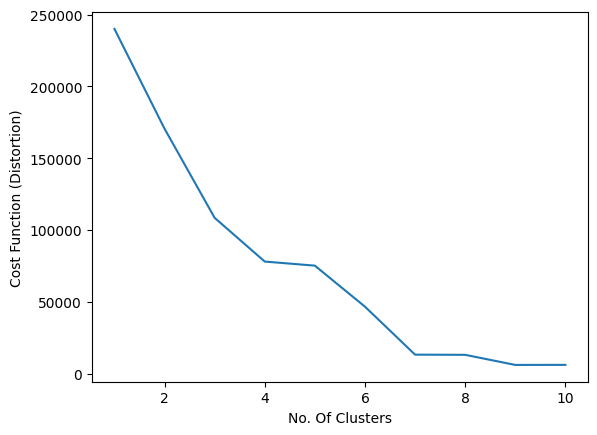

In [36]:
x=np.arange(1,11)
plt.plot(x,J)
plt.xlabel('No. Of Clusters')
plt.ylabel('Cost Function (Distortion)')
plt.show()

Based on the above plot of (Distortion Function) vs (No. Of Clusters), we find using Elbow Method that 7 is the best no. of clusters we can choose because it best represents the elbow of the curve.


In [37]:
idx_df=pd.DataFrame(idx)
idx_df.to_csv("Unsupervised_Indices.csv", index=False)

In [39]:
! cat Unsupervised_Indices.csv

0
4
6
1
2
2
4
6
1
4
1
1
2
2
4
3
6
6
6
4
6
5
4
4
6
3
4
4
4
4
0
6
0
4
6
4
4
6
5
6
6
4
2
0
6
4
1
4
1
2
6
4
6
4
3
4
1
4
4
5
1
4
2
4
4
6
6
4
4
3
0
6
1
6
6
4
2
5
6
6
2
5
5
6
6
1
0
6
5
4
4
4
4
1
1
6
1
2
6
5
4
6
4
4
6
4
6
1
2
2
1
4
6
1
4
6
1
1
6
2
4
1
0
6
4
4
4
6
4
6
2
6
6
1
4
4
2
1
2
1
4
6
2
1
4
4
0
6
6
4
3
2
4
1
3
1
4
4
6
1
4
6
6
4
6
6
6
1
6
0
2
6
1
4
5
4
6
6
2
6
4
1
6
6
2
6
6
6
2
6
6
5
6
2
1
1
1
6
6
4
2
6
4
6
6
0
2
1
5
4
2
3
4
6
4
1
5
1
6
2
4
6
6
4
1
6
4
0
1
1
4
1
6
2
2
6
4
4
6
6
6
6
0
6
4
2
5
6
6
3
6
4
4
4
6
3
6
6
0
2
2
2
6
2
1
1
6
1
4
2
6
6
6
1
1
0
1
6
1
4
2
4
1
6
4
2
6
6
4
0
4
5
2
1
6
4
4
1
4
1
5
0
4
4
1
2
1
6
6
6
4
1
2
0
1
2
0
1
5
1
1
1
4
4
3
6
4
4
6
2
1
6
4
1
2
6
6
4
0
0
1
6
1
4
6
3
6
2
2
4
6
2
6
0
6
6
4
4
6
2
6
2
2
1
3
2
2
2
2
1
0
2
6
4
1
3
4
4
4
2
1
1
6
2
5
6
3
4
4
1
6
6
0
5
4
1
4
6
4
6
4
4
0
6
4
6
1
3
6
4
2
4
4
6
2
4
4
6
6
4
2
4
4
1
6
4
1
4
0
6
4
4
6
5
3
2
0
6
1
4
4
1
1
4
6
4
2
1
4
3
4
4
2
6
5
3
6
4
1
6
4
5
4
4
6
4
6
6
6
2
4
4
4
2
2
6
2
6
6
4
4
4
1
5
4
6
6
2
6
6
2
1
4
6
5
4
2
4
4
2
